# The devolpment in the supply balance and turning point analysis for GDP

In [4]:
!pip install matplotlib-venn

## 1. Imports and sets magics:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

## 2. Setting up API to import data from Danmarks Statistik:

We are setting up our API that will allow us to retrieve data from Danmarks Statistik. This we are doing by using someone else work:

In [6]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi
%pip install pandas-datareader

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

  Cloning https://github.com/alemartinello/dstapi to c:\users\lucas\appdata\local\temp\pip-req-build-766q8ps5
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi 'C:\Users\lucas\AppData\Local\Temp\pip-req-build-766q8ps5'


Note: you may need to restart the kernel to use updated packages.


## 3. Retrieving and exploring datasets

Now we have set up an API that makes it possible to retrieve data from the different datasets on Danmarks Statistiks website. In order to be able to make our analysis on the supply balance development and a turning point analysis on GDP, we retrieve two datasets. First we retrieve the dataset NAN1 that includes data on all the components of the supply balance. Then we make a summary of the data we retrieved to check what the dataset includes and that we have retrieved it correctly.

In [7]:
forsyningsbalanen = DstApi('NAN1')
tabsum = forsyningsbalanen.tablesummary(language = 'en')
display(tabsum)
for variable in tabsum['variable name']:
    print(variable+':')
    display(forsyningsbalanen.variable_levels(variable, language='en'))

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-03-27T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,Tid,58,1966,1966,2023,2023,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


In order to be able to make our turning point analysis on GDP we retrieve the dataset NKN1. Then we make a summary of the data we retrieved to check what the dataset includes and that we have retrieved it correctly.

In [8]:
kvartal_bnp = DstApi('NKN1')
tabsum2 = kvartal_bnp.tablesummary(language = 'en')
display(tabsum2)
for variable in tabsum['variable name']:
    print(variable+':')
    display(kvartal_bnp.variable_levels(variable, language='en'))

Table NKN1: Demand and supply by transaction, price unit, seasonal adjustment and time
Last update: 2024-03-27T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LKV_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,SÆSON,2,N,Non-seasonally adjusted,Y,Seasonally adjusted,False
3,Tid,136,1990K1,1990Q1,2023K4,2023Q4,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,L_V,Period-to-period real growth (per cent)
2,V_C,"Pr. capita. Current prices, (1000 DKK.)"
3,LKV_M,"2010-prices, chained values, (bill. DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LKV_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1990K1,1990Q1
1,1990K2,1990Q2
2,1990K3,1990Q3
3,1990K4,1990Q4
4,1991K1,1991Q1
...,...,...
131,2022K4,2022Q4
132,2023K1,2023Q1
133,2023K2,2023Q2
134,2023K3,2023Q3


## Selecting data

We select our specific data that we later use in our analysis/graphs. The functions for choosing the specific data is defined in our .py file. For supply balance components we look at GDP, Import, Export and private consumption. We select data from 1990 and onwards and in chained values (2010-prices).

In [30]:
#Supply balance BNP
print(dataproject.supply_balance_BNP())

        TID INDHOLD
8568   1990  1288.6
745    1991  1306.6
7080   1992  1332.2
5581   1993  1332.3
9487   1994  1403.3
6697   1995  1445.8
3532   1996  1487.8
8010   1997  1536.3
5767   1998  1570.3
2295   1999  1616.6
7824   2000  1677.2
6325   2001  1691.0
4279   2002  1698.9
6876   2003  1705.5
8196   2004  1751.0
373    2005  1792.0
9673   2006  1862.1
931    2007  1879.0
2416   2008  1869.4
8382   2009  1777.7
1489   2010  1810.9
1675   2011  1835.1
7452   2012  1839.3
5023   2013  1856.5
3346   2014  1886.5
2044   2015  1930.7
10603  2016  1993.4
2788   2017  2049.6
5953   2018  2090.4
1861   2019  2121.6
1117   2020  2070.2
5395   2021  2211.9
187    2022  2272.3
6894   2023  2315.2


In [10]:
#Supply balance import
print(dataproject.supply_balance_import())

        TID INDHOLD
4801   1966   112.2
8904   1967   120.0
10381  1968   127.7
3310   1969   144.0
4987   1970   157.2
10009  1971   159.4
10567  1972   161.3
6661   1973   190.0
9451   1974   186.1
4243   1975   176.9
9090   1976   206.6
2752   1977   208.4
5359   1978   210.4
151    1979   224.4
7416   1980   211.9
10195  1981   213.1
1449   1982   219.8
3124   1983   224.1
4615   1984   236.1
709    1985   259.6
4036   1986   281.6
6840   1987   278.3
6289   1988   290.0
7788   1989   305.7
8718   1990   312.9
895    1991   325.6
7230   1992   325.1
5731   1993   320.5
9637   1994   363.1
9265   1995   388.6
3682   1996   400.7
8160   1997   437.6
5917   1998   470.7
2259   1999   482.7
7974   2000   548.7
6475   2001   561.9
4429   2002   597.7
3850   2003   591.6
8346   2004   633.8
523    2005   705.3
9823   2006   803.9
1081   2007   850.8
2566   2008   891.4
8532   2009   784.9
1639   2010   789.1
1825   2011   847.9
7602   2012   870.9
5173   2013   883.7
3496   2014   918.1


In [11]:
#Supply balance export
print(dataproject.supply_balance_export())

        TID INDHOLD
4783   1966   123.6
8886   1967   128.2
10363  1968   140.7
3292   1969   149.2
4969   1970   154.9
9991   1971   164.7
10549  1972   173.4
6643   1973   187.8
9433   1974   194.2
4225   1975   192.8
9072   1976   199.5
2734   1977   206.6
5341   1978   209.5
133    1979   232.3
7398   1980   245.3
10177  1981   266.5
1431   1982   275.0
3106   1983   287.6
4597   1984   297.1
691    1985   315.0
4018   1986   319.2
6822   1987   334.7
6271   1988   365.3
7770   1989   382.3
8700   1990   407.3
877    1991   432.4
7212   1992   433.6
5713   1993   438.9
9619   1994   475.1
9247   1995   488.8
3664   1996   511.5
8142   1997   534.5
5899   1998   556.4
2241   1999   619.1
7956   2000   696.9
6457   2001   720.3
4411   2002   751.7
3832   2003   742.7
8328   2004   765.1
505    2005   824.2
9805   2006   909.4
1063   2007   942.6
2548   2008   979.1
8514   2009   888.8
1621   2010   914.9
1807   2011   980.8
7584   2012   992.2
5155   2013  1008.1
3478   2014  1039.7


In [12]:
#Supply balance privat
print(dataproject.supply_balance_privat())

        TID INDHOLD
8592   1990   620.4
769    1991   630.5
7104   1992   646.7
5605   1993   641.1
9511   1994   683.8
9139   1995   695.3
3556   1996   712.4
8034   1997   733.3
5791   1998   750.6
2319   1999   749.7
7848   2000   752.6
6349   2001   754.3
4303   2002   765.2
3724   2003   775.4
8220   2004   811.5
397    2005   841.5
9697   2006   866.3
955    2007   881.6
2440   2008   885.9
8406   2009   855.5
1513   2010   862.2
1699   2011   864.6
7476   2012   869.0
5047   2013   871.5
3370   2014   879.4
2068   2015   899.5
10627  2016   921.2
2812   2017   942.3
5977   2018   975.2
1885   2019   990.6
1141   2020   977.0
5419   2021  1030.5
211    2022  1015.7
6918   2023  1026.3


In the same way as the supply balance we choose data for a turning point analysis. Here we choose quarterly GDP from 1990 untill 2023 3. quarter in chained values and seasonally adjusted.

In [13]:
#Quarterly BNP, seasonally adjusted
print(dataproject.quarterly_BNP())

          TID INDHOLD
7299   1990Q1      ..
40777  1990Q2      ..
29914  1990Q3      ..
15804  1990Q4      ..
12552  1991Q1   326.6
...       ...     ...
8529   2022Q4   570.1
24692  2023Q1   577.5
11246  2023Q2   572.9
23305  2023Q3   574.9
46360  2023Q4   589.9

[136 rows x 2 columns]


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

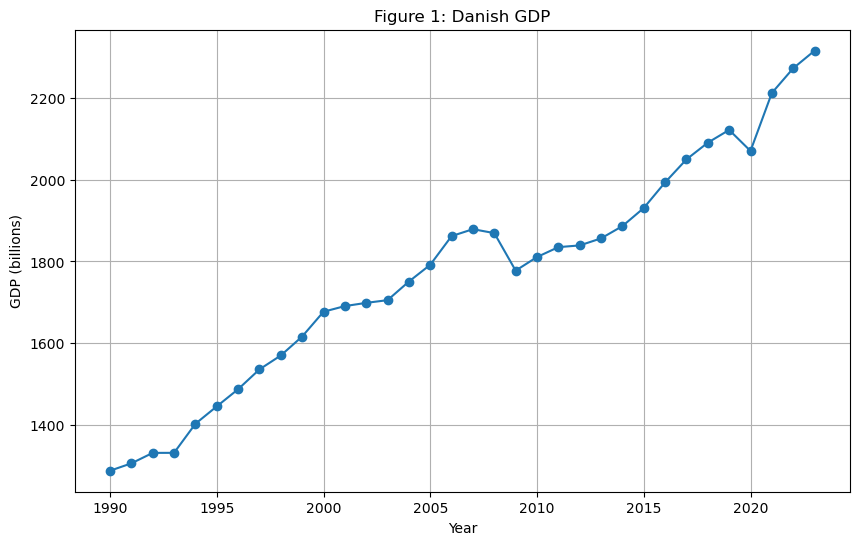

In [31]:
from dataproject import supply_balance_BNP  # Importing the function

# Call the function to get the data
df = supply_balance_BNP()

# Convert 'INDHOLD' to numeric, replacing '..' with NaN
df['INDHOLD'] = pd.to_numeric(df['INDHOLD'], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['TID'], df['INDHOLD'], marker='o', linestyle='-')
plt.title('Figure 1: Danish GDP')
plt.xlabel('Year')
plt.ylabel('GDP (billions)')

plt.grid(True)
plt.show()

On figure 1 we can see GDP for Denmark in 2010-chained values through the years from 1990 to 2024. In this period GDP for Denmark has increase from 1288.6 to 2315.2 which is almost a 100 pct. increase which is really impressive for Denmark and the people who live there. Notably, we can clearly see the dives from the financial crisis in 2008 and 2009 which was an international recession which also impacted Denmark especially through export. Also note the dive in 2020 which saw a more temporary dive of GDP unlike the financial crisis which was more long lasting. 

# Figure 2

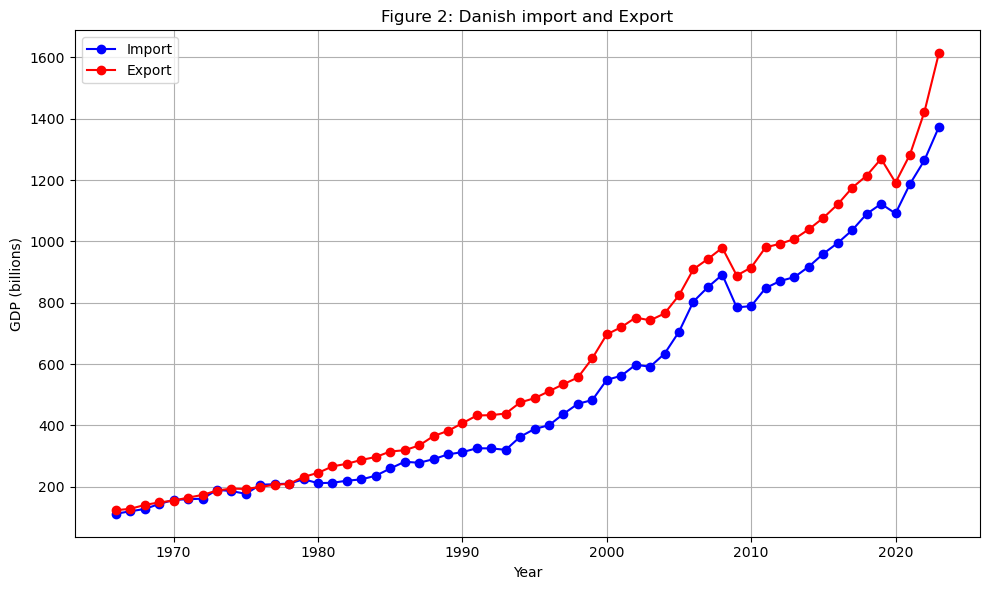

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from dataproject import supply_balance_import, supply_balance_export  # Importing the functions

# Call the functions to get the data
df1 = supply_balance_import()
df2 = supply_balance_export()

# Convert 'INDHOLD' to numeric, replacing '..' with NaN
df1['INDHOLD'] = pd.to_numeric(df1['INDHOLD'], errors='coerce')
df2['INDHOLD'] = pd.to_numeric(df2['INDHOLD'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))

# Plotting both datasets in the same diagram
plt.plot(df1['TID'], df1['INDHOLD'], marker='o', linestyle='-', color='blue', label='Import')
plt.plot(df2['TID'], df2['INDHOLD'], marker='o', linestyle='-', color='red', label='Export')

plt.title('Figure 2: Danish import and Export')
plt.xlabel('Year')
plt.ylabel('GDP (billions)')
plt.grid(True)
plt.legend()  # Show legend with labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In figure 2 we see import and export in 2010-chained prices from 1966 to 2024. We can clearly see that there has been a positive growth thorughout the periosd with dips in 2008-2010 because of the financial crisis and a dip in 2020 for corona crisis. Note that export has been bigger than import for Denmark since the 1980 and we have had fixed exchange rate system since 1982 which cannot be a coincidence. Evidence points to that our currency is too "weak" in the long term since export should be equal to import in the long run. 

# Figure 3


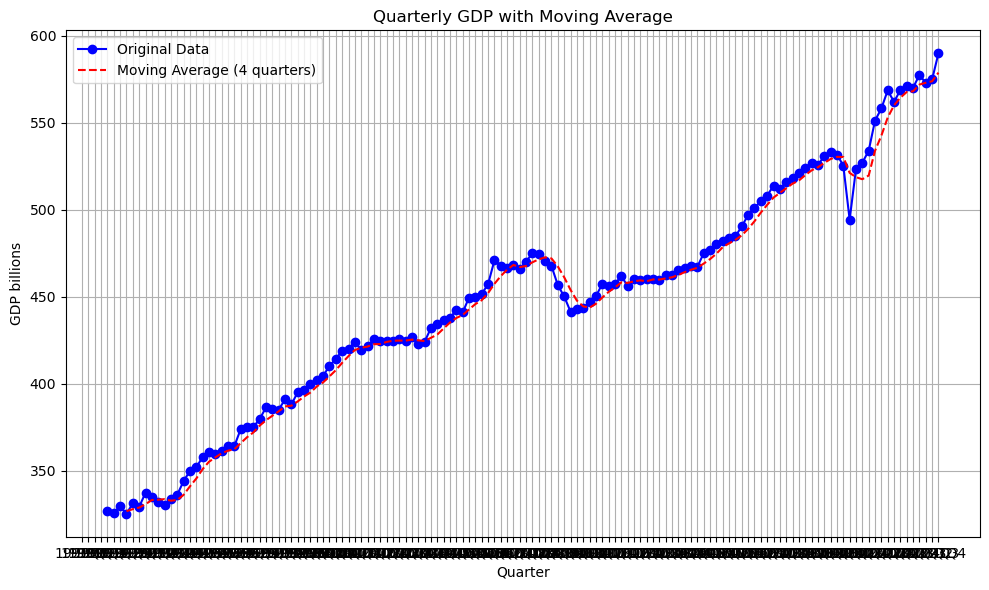

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import dataproject  # Importing the module

moving_avg_len = 4

# Call the function to get the data
Q_BNP_rollingavg = dataproject.quarterly_BNP_for_mov_avg()

# Convert 'INDHOLD' column to numeric
Q_BNP_rollingavg['INDHOLD'] = pd.to_numeric(Q_BNP_rollingavg['INDHOLD'], errors='coerce')

# Calculate the rolling mean
moving_avg = Q_BNP_rollingavg['INDHOLD'].rolling(window=moving_avg_len).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(Q_BNP_rollingavg['TID'], Q_BNP_rollingavg['INDHOLD'], marker='o', linestyle='-', color='blue', label='Original Data')

# Plot moving average
plt.plot(Q_BNP_rollingavg['TID'], moving_avg, linestyle='--', color='red', label=f'Moving Average ({moving_avg_len} quarters)')

plt.title('Figure 3: Quarterly GDP with Moving Average')
plt.xlabel('Quarter')
plt.ylabel('GDP billions')
plt.grid(True)
plt.legend()  # Show legend with labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In figure 3 can see GDP quarterly from 1990 to 2024 in 2010-chained prices. The red line is the moving average and the blue dots are the quarterly seasonally-adjusted.

# Conclusion

For all three figures we can see an increase in GDP, import and export for Denmark from the years 1966 to 2024 and 1990 to 2024.